# Imports

In [17]:
import geopandas
import geodatasets
import geoplot
import contextily as cx
import pandas as pd

import matplotlib 
from matplotlib import pyplot as plt
from math import exp

import ssl


In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context

# Data import

The data is the GDP per capita per city per year according to OECD data.

In [9]:
df = pd.read_excel('./data2.xlsx')

In [3]:
df.head()

,Pays,Ville,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,Greater Sydney,41104.0,41800.0,43010.0,43254.0,42830.0,42982.0,43192.0,42669.0,...,43762,44657,44669,45929,47345.0,47555.0,47732.0,47581,46140,46320.0
1,Australia,Greater Melbourne,40495.0,41139.0,42169.0,42802.0,42196.0,42306.0,43155.0,41732.0,...,42099,42121,41893,42823,43672.0,43351.0,43953.0,43675,42912,41736.0
2,Australia,Greater Brisbane,35293.0,35690.0,37113.0,38665.0,40729.0,42109.0,42235.0,43719.0,...,42082,41758,41448,41729,42288.0,43544.0,44747.0,44471,42198,41153.0
3,Australia,Greater Perth,43365.0,44885.0,46508.0,48747.0,52860.0,57573.0,59808.0,60408.0,...,69463,68560,71877,66285,62529.0,62422.0,62298.0,66522,69979,77950.0
4,Australia,Greater Adelaide,36114.0,36942.0,37514.0,37458.0,37349.0,37587.0,38369.0,37887.0,...,38520,38919,38859,39397,39464.0,38999.0,39194.0,38782,37915,38860.0


In [10]:
gdf = geopandas.read_file("./2_hoch.geo.json")

<AxesSubplot:>

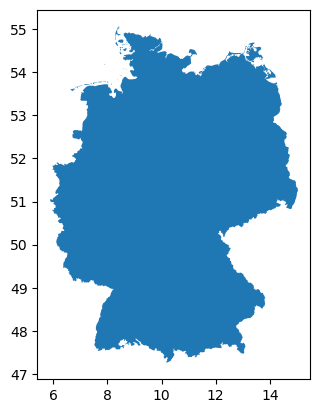

In [5]:
gdf.plot()

# Data preparation

In [11]:
df["Pays"] = df.Pays.astype('string').apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df["Ville"] = df.Ville.astype('string').apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [12]:
df['result'] ="https://nominatim.openstreetmap.org/search?addressdetails=1&q="+df.Ville.apply(lambda x: x.replace(" ","+"))+","+df.Pays.apply(lambda x: x.replace(" ","+"))+"&format=geojson"

In [13]:
df['result'][0]

'https://nominatim.openstreetmap.org/search?addressdetails=1&q=++Greater+Sydney,Australia&format=geojson'

In [15]:
test = geopandas.read_file(df.result[32])

In [16]:
test

,place_id,osm_type,osm_id,place_rank,category,type,importance,addresstype,name,display_name,address,geometry
0,326807648,relation,3227127,12,boundary,administrative,0.64148,city,Calgary,"Calgary, Alberta, Canada","{'city': 'Calgary', 'state': 'Alberta', 'ISO31...",POINT (-114.05754 51.04561)


In [20]:
type(test)

geopandas.geodataframe.GeoDataFrame

In [21]:
df.columns = [str(col) for col in df.columns]
df = df.dropna()

In [22]:
df['2020'] = df['2020'].astype(int)

Richest cities in the world

In [20]:
df[df['Pays'] != 'United States'].nlargest(25,'2020')

,Pays,Ville,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,result
383,Luxembourg,Luxembourg,96970.0,98958.0,100588.0,103310.0,104436.0,108866.0,115927.0,113760.0,...,108135,109035,109321,109165.0,111957.0,110662.0,109902,110274,107261.0,https://nominatim.openstreetmap.org/search?add...
278,Ireland,Dublin,58174.0,59172.0,59953.0,64671.0,68861.0,69883.0,72553.0,69324.0,...,62841,66586,73154,74566.0,82249.0,87359.0,92348,95770,102486.0,https://nominatim.openstreetmap.org/search?add...
130,Germany,Wolfsburg,57971.0,51973.0,52461.0,49190.0,55059.0,55411.0,58157.0,58470.0,...,72491,72121,75013,65426.0,89816.0,83831.0,89986,93026,82193.0,https://nominatim.openstreetmap.org/search?add...
86,Germany,Mnchen,73727.0,73048.0,70439.0,71714.0,72297.0,74035.0,75998.0,73576.0,...,76825,76701,77350,78436.0,79901.0,82311.0,82012,83201,79635.0,https://nominatim.openstreetmap.org/search?add...
134,Germany,Ingolstadt,50018.0,49664.0,50844.0,51032.0,52557.0,58123.0,58404.0,55369.0,...,76663,83364,82188,85669.0,84000.0,84307.0,82159,85162,79412.0,https://nominatim.openstreetmap.org/search?add...
3,Australia,Greater Perth,43365.0,44885.0,46508.0,48747.0,52860.0,57573.0,59808.0,60408.0,...,68560,71877,66285,62529.0,62422.0,62298.0,66522,69979,77950.0,https://nominatim.openstreetmap.org/search?add...
505,Slovak Republic,Bratislava,38497.0,41379.0,43221.0,45589.0,52214.0,54721.0,62089.0,64542.0,...,68658,70507,70574,74367.0,75716.0,76435.0,78091,77659,74562.0,https://nominatim.openstreetmap.org/search?add...
136,Germany,Erlangen,45101.0,47134.0,48740.0,50278.0,49252.0,51955.0,54096.0,57311.0,...,64744,63337,65441,68161.0,67619.0,68541.0,71548,73057,72226.0,https://nominatim.openstreetmap.org/search?add...
509,Sweden,Stockholm,55147.0,55933.0,56470.0,59662.0,61638.0,63003.0,65316.0,64181.0,...,64966,65239,66875,69594.0,69437.0,68738.0,69546,70907,68720.0,https://nominatim.openstreetmap.org/search?add...
131,Germany,Heilbronn,51618.0,49554.0,47791.0,48032.0,49257.0,53351.0,54294.0,55168.0,...,62464,65237,66203,67287.0,65316.0,67685.0,70282,71666,68102.0,https://nominatim.openstreetmap.org/search?add...


In [23]:
dfG = df[df['Pays'] == 'Germany']

In [17]:
dfG = dfG.nlargest(15,'2020')

15 richest cities in germany 

In [18]:
dfG.head()

,Pays,Ville,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,result
130,Germany,Wolfsburg,57971.0,51973.0,52461.0,49190.0,55059.0,55411.0,58157.0,58470.0,...,72491,72121,75013,65426.0,89816.0,83831.0,89986,93026,82193.0,https://nominatim.openstreetmap.org/search?add...
86,Germany,Mnchen,73727.0,73048.0,70439.0,71714.0,72297.0,74035.0,75998.0,73576.0,...,76825,76701,77350,78436.0,79901.0,82311.0,82012,83201,79635.0,https://nominatim.openstreetmap.org/search?add...
134,Germany,Ingolstadt,50018.0,49664.0,50844.0,51032.0,52557.0,58123.0,58404.0,55369.0,...,76663,83364,82188,85669.0,84000.0,84307.0,82159,85162,79412.0,https://nominatim.openstreetmap.org/search?add...
136,Germany,Erlangen,45101.0,47134.0,48740.0,50278.0,49252.0,51955.0,54096.0,57311.0,...,64744,63337,65441,68161.0,67619.0,68541.0,71548,73057,72226.0,https://nominatim.openstreetmap.org/search?add...
131,Germany,Heilbronn,51618.0,49554.0,47791.0,48032.0,49257.0,53351.0,54294.0,55168.0,...,62464,65237,66203,67287.0,65316.0,67685.0,70282,71666,68102.0,https://nominatim.openstreetmap.org/search?add...


# Graph generation

In [68]:
plt.isinteractive()

True

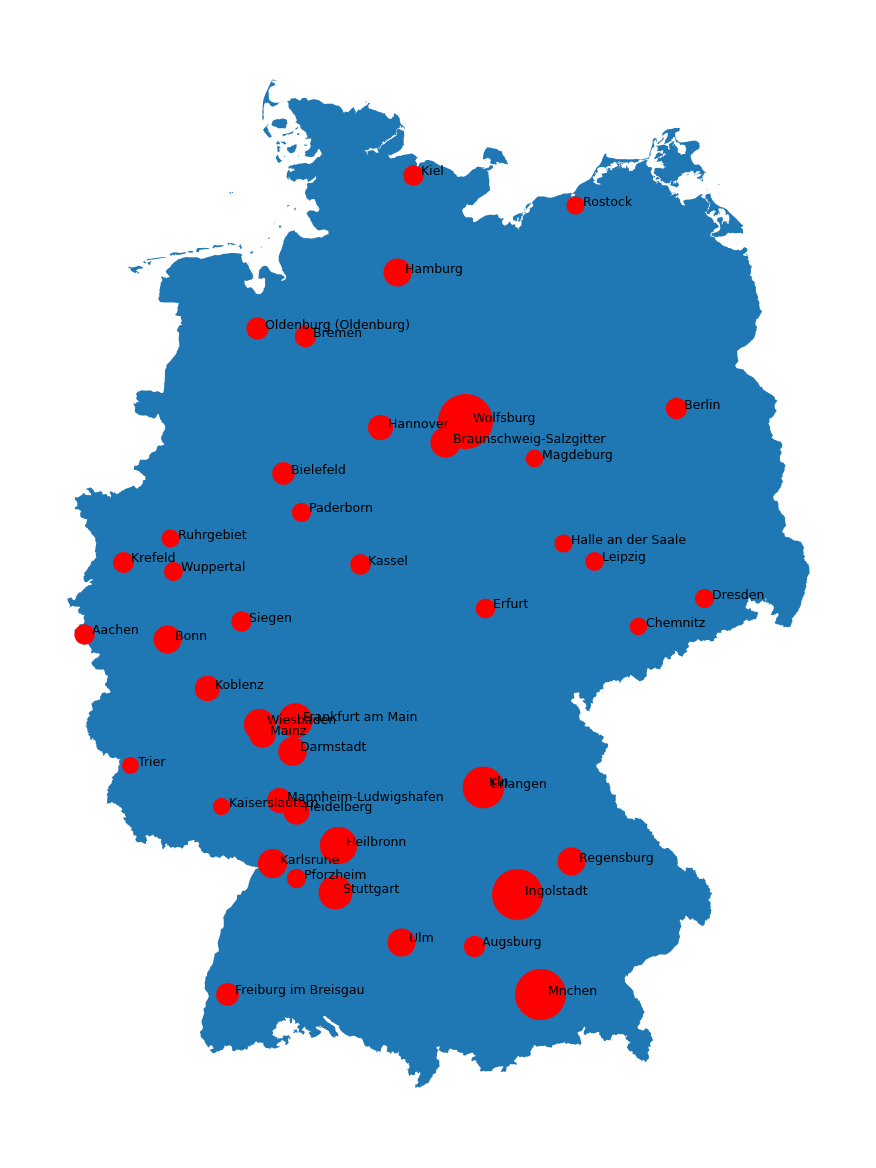

In [71]:
base = gdf.plot()
base.set_axis_off()

max = dfG['2020'].max()

with plt.ioff():
    for i in range(len(dfG)):
        city = geopandas.read_file(dfG.result.iloc[i]).head(1)
        if len(city) > 0 :
            city.geometry.plot(ax=base, marker='o', color='red', markersize = exp(((dfG['2020'].iloc[i])/max))**5)
            base.text(city.geometry.x.max(), city.geometry.y.max(),dfG.Ville.iloc[i], size=3)
    fig = base.get_figure()
    fig.savefig('fig',bbox_inches='tight')

